# Calculate and visualize Freezing Index from a multi-sensor gait txt file

In [ ]:
import os
import mne
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
from mne.time_frequency import psd_welch
from scipy.signal import welch

def scipy_psd_welch(arr, sampling_rate, fmin=0, fmax=np.inf, n_fft=256, window="hamming", n_overlap=0):
    """
    计算信号的功率谱密度
    :param signal: 信号
    :param sampling_rate: 采样率
    :param window_size: 窗口大小
    :param overlap: 重叠大小
    :return: 频率和功率谱密度
    """
    # 如果输入是一维信号，转换为二维
    if arr.ndim == 1:
        arr = arr[np.newaxis, :]
    n_channels = arr.shape[0]
    psds = []
    freqs = None

    for i in range(n_channels):
        f, Pxx = welch(arr[i], fs=sampling_rate, nperseg=n_fft, noverlap=n_overlap, window=window)
        psds.append(Pxx)
        if freqs is None:
            freqs = f
    # 转换为 numpy 数组
    psds = np.array(psds)

    # 根据 fmin 和 fmax 过滤频率
    if fmin is not None or fmax is not None:
        freq_mask = (freqs >= fmin) & (freqs <= fmax)
        freqs = freqs[freq_mask]
        psds = psds[:, freq_mask]
    return psds, freqs

In C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Lenovo\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_tes

Import data

In [2]:
#Import gait txt file and delete the unit row

f_folder = "C:\\Users\\Lenovo\\1代码 上传\\"
f_name = "gait_test.txt"
f_name_clear = f_name[:-4]
name = f_name_clear + '_clear.txt'

with open(f'{f_folder}{f_name}','r',encoding='gbk')as f:
    lines = f.readlines()
ge = ['mm']
new = ''
for line in lines:
    mode = True
    for i in ge:
        if i in line:
            mode = False
            break
    if mode:
        new += line
with open(f'{f_folder}{f_name_clear}_clear.txt','w')as f:
    f.write(new)

In [3]:
#Import the clear gait txt file into python as dataframe

df = pd.read_csv("%s%s" %(f_folder,name),header=[2],sep = '	')

m_list = ['Time',
          'R.5MT.X','R.5MT.Z','L.5MT.X','L.5MT.Z',
          'P.RSacWand.X','P.RSacWand.Z','P.LSacWand.X','P.LSacWand.Z',
         'R.Thigh.1.X','R.Thigh.1.Z','L.Thigh.1.X','L.Thigh.1.Z',
         'R.Shank.1.X','R.Shank.1.Z','L.Shank.1.X','L.Shank.1.Z']
df = df [m_list]
df.head()

,Time,R.5MT.X,R.5MT.Z,L.5MT.X,L.5MT.Z,P.RSacWand.X,P.RSacWand.Z,P.LSacWand.X,P.LSacWand.Z,R.Thigh.1.X,R.Thigh.1.Z,L.Thigh.1.X,L.Thigh.1.Z,R.Shank.1.X,R.Shank.1.Z,L.Shank.1.X,L.Shank.1.Z
0,0.000,3855.774,40.249,3834.117,46.652,4373.186,838.767,0.0,0.0,3807.016,448.962,3865.588,608.133,3840.583,248.774,3857.111,405.225
1,0.005,3855.774,40.249,3834.117,46.652,4373.186,838.767,0.0,0.0,3807.016,448.962,3865.588,608.133,3840.583,248.774,3857.111,405.225
2,0.010,3855.548,40.684,3833.379,47.750,4372.274,839.326,0.0,0.0,3807.991,449.358,3865.823,608.925,3841.486,249.277,3858.543,404.911
3,0.015,3855.799,40.305,3833.633,47.431,4371.752,839.311,0.0,0.0,3809.056,449.570,3866.683,608.866,3842.413,249.484,3859.090,406.138
4,0.020,3855.804,40.102,3833.379,47.854,4370.424,840.126,0.0,0.0,3810.894,448.645,3866.984,609.393,3843.129,250.223,3860.524,406.086


# Visualization of the before-preprocessd data

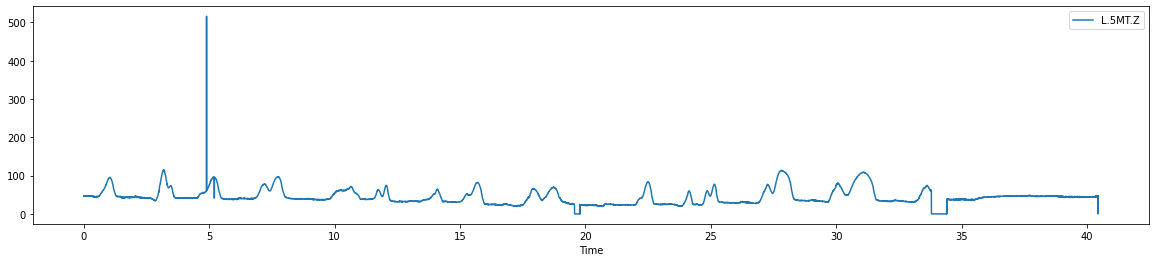

In [4]:
#Visualize vertical movement track of the left foot
ax1 = df.plot(x='Time' ,y='L.5MT.Z', figsize=(20,4))

# Preprocess and visualization of the post-preprocessd data

C:\Users\Lenovo\Anaconda3\lib\site-packages\pandas\core\frame.py:4527: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


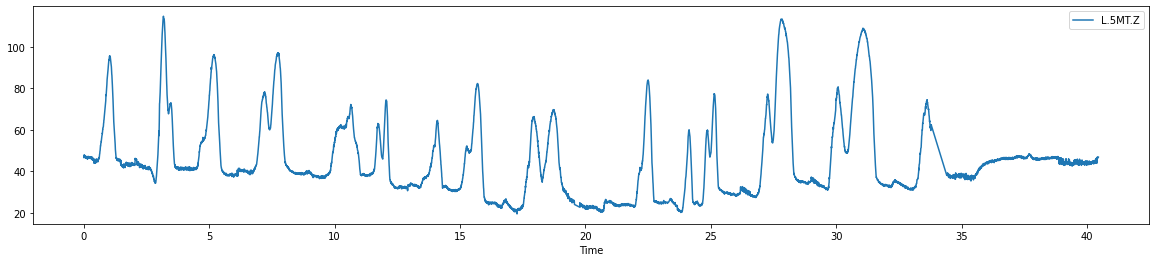

In [5]:
df[1:].replace(0, np.nan, inplace=True) # Replace nan as 0 


for i in m_list[1:]:
    #超过5个标准差，赋值为nan
    bar = df[i].mean()
    std = df[i].std()
    df.loc[df[i] > bar + 5 * std, i] = np.nan #Find outliers exceeded 5 std
    df.loc[df[i] < bar - 5 * std, i] = np.nan

    #找到跳跃值，赋值为nan
    df.loc[df.diff()[i].nlargest(15).index] = np.nan # Find possible jump value
    df.loc[df.diff()[i].nsmallest(15).index] = np.nan
    
## 对nan进行插值    
df = df.interpolate(method='linear')
ax1 = df.plot(x='Time' ,y='L.5MT.Z', figsize=(20,4))

# Convert displacement data to acceleration data

In [6]:
acc_list = ['acc_Rft','acc_Lft','acc_Rsh','acc_Lsh','acc_Rth','acc_Lth','acc_Rlm','acc_Llm']
location_list = ['R.5MT.X','L.5MT.X','R.Shank.1.X','L.Shank.1.X','R.Thigh.1.X','L.Thigh.1.X','P.RSacWand.X','P.LSacWand.X']
for acc, loc in zip (acc_list, location_list):
    df[acc] = df[loc].diff().diff()
df.replace(np.nan, 0, inplace=True)
df.head()

,Time,R.5MT.X,R.5MT.Z,L.5MT.X,L.5MT.Z,P.RSacWand.X,P.RSacWand.Z,P.LSacWand.X,P.LSacWand.Z,R.Thigh.1.X,...,L.Shank.1.X,L.Shank.1.Z,acc_Rft,acc_Lft,acc_Rsh,acc_Lsh,acc_Rth,acc_Lth,acc_Rlm,acc_Llm
0,0.000,3855.774,40.249,3834.117,46.652,4373.186,838.767,0.000,0.0,3807.016,...,3857.111,405.225,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000000e+00
1,0.005,3855.774,40.249,3834.117,46.652,4373.186,838.767,207.254,0.0,3807.016,...,3857.111,405.225,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000000e+00
2,0.010,3855.548,40.684,3833.379,47.750,4372.274,839.326,414.508,0.0,3807.991,...,3858.543,404.911,-0.226,-0.738,0.903,1.432,0.975,0.235,-0.912,0.000000e+00
3,0.015,3855.799,40.305,3833.633,47.431,4371.752,839.311,621.762,0.0,3809.056,...,3859.090,406.138,0.477,0.992,0.024,-0.885,0.090,0.625,0.390,-2.842171e-14
4,0.020,3855.804,40.102,3833.379,47.854,4370.424,840.126,829.016,0.0,3810.894,...,3860.524,406.086,-0.246,-0.508,-0.211,0.887,0.773,-0.559,-0.806,5.684342e-14


# Convert the accelaration data to the MNE raw file

In [7]:
## Define info
n_channels = 8
ch_names = acc_list
info = mne.create_info( ch_names,sfreq = 1/df['Time'][1])

##Create mne raw
times = df['Time'].tolist()
data = np.array([df['acc_Rft'].tolist(),df['acc_Lft'].tolist(),df['acc_Rsh'].tolist(),df['acc_Lsh'].tolist(),
                  df['acc_Rth'].tolist(),df['acc_Lth'].tolist(),df['acc_Rlm'].tolist(),df['acc_Llm'].tolist()])
raw = mne.io.RawArray(data, info)
raw.filter(0.1, 10, fir_design='firwin',picks = 'all')
raw.info

Creating RawArray with float64 data, n_channels=8, n_times=8092
    Range : 0 ... 8091 =      0.000 ...    40.455 secs
Ready.
No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 10 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 2.50 Hz (-6 dB cutoff frequency: 11.25 Hz)
- Filter length: 6601 samples (33.005 sec)



<Info | 7 non-empty values
 bads: []
 ch_names: acc_Rft, acc_Lft, acc_Rsh, acc_Lsh, acc_Rth, acc_Lth, acc_Rlm, ...
 chs: 8 MISC
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 100.0 Hz
 meas_date: unspecified
 nchan: 8
 projs: []
 sfreq: 200.0 Hz
>

# Visualize acceleration data together with displacement data

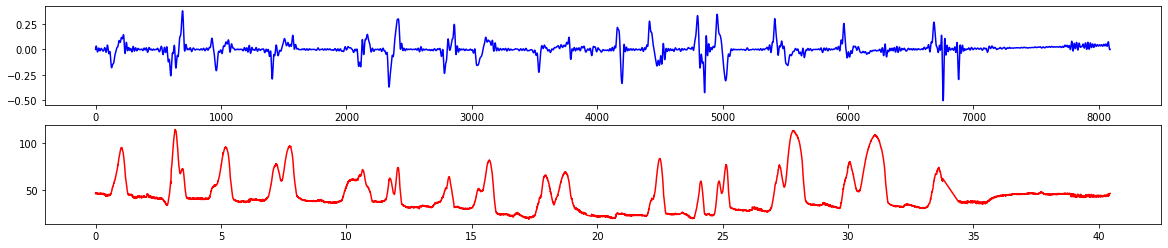

In [8]:
data = raw.get_data(picks = 'acc_Lft').squeeze()
fig, axs = plt.subplots(2,figsize=(20,4))

axs[0].plot(data, color = 'b')
ax1.set_ylim(data.min()*1.5, data.max()*1.5)

axs[1].plot(df['Time'],df['L.5MT.Z'], color = 'r')

# Calculate freezing index with a 6s calculation window and 0.1 rolling window

In [9]:
RS_list = ['acc_Rft','acc_Lft','acc_Rsh','acc_Lsh','acc_Rth','acc_Lth','acc_Rlm','acc_Llm']

t_time = int(raw.n_times/raw.info['sfreq'])
n_fft = int(raw.info['sfreq']*5.12)
fmin =0
fmax = 8.3
n_overlap = 0

co_fogi = []
time = []
co_RS = []
t = 0
while 6+0.1*t<= t_time :
    for RS in RS_list:
        psds, freqs = psd_welch(raw, picks=RS, n_fft = n_fft, window = 'hann', 
                              n_overlap =n_overlap, fmin=fmin, fmax = fmax,
                               tmin = 0.1*t, tmax = 6+0.1*t)
        psds = np.squeeze(psds)
        fogi = psds[17:].sum()/psds[:17].sum()
        co_fogi += [fogi]
        co_RS += [RS]
        time += [3+0.1*t]
    t += 1
final = pd.DataFrame({'time':time,'co_fogi':co_fogi,'co_RS':co_RS})
mean = final.groupby('time',as_index=False).mean()
ex_folder = 'C:\\Users\\Lenovo\\1代码 上传\\'
final.to_excel("%s%s_fi.xls" %(ex_folder,name[:-4]))
mean.to_excel("%s%s_average_fi.xls" %(ex_folder,name[:-4]))

Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective wind

Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective wind

Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective wind

Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective wind

Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective wind

Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective wind

Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective wind

Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective wind

Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective wind

Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective wind

Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective wind

Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective window size : 5.120 (s)
Effective wind

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and 

# Plot Freezing Index together with forward and vertical displacement

In [10]:
#Filter Verticle position to range (0.3, 8) Hz
n_channels = 1
ch_names = ['Z']
info = mne.create_info( ch_names,sfreq = 1/df['Time'][1])

times = df['Time'].tolist()
gait_data = np.array([df['R.5MT.Z'].tolist()])
gait= mne.io.RawArray (gait_data, info)
gait.filter(0.3, 8, fir_design='firwin',picks = 'Z')
Z_list = gait.get_data(picks = 'Z').squeeze()
df['Forward position'] = -1*df['L.5MT.X']
df['Vertical position'] = Z_list 

Creating RawArray with float64 data, n_channels=1, n_times=8092
    Range : 0 ... 8091 =      0.000 ...    40.455 secs
Ready.
No data channels found. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.3 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 8.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 9.00 Hz)
- Filter length: 2201 samples (11.005 sec)



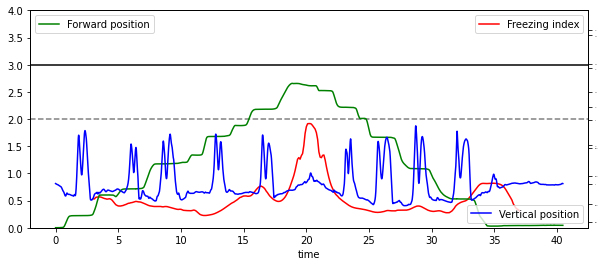

In [11]:
# plot
ax1 = mean.plot(x='time' ,y='co_fogi', figsize=(10,4),color='red',ylim = (0,4),label='Freezing index')
plot = plt.axhline(y=3, color='black', linestyle='solid')
plot = plt.axhline(y=2, color='gray', linestyle='dashed')

ax2 = ax1.twinx() 
ax3= ax1.twinx() 

plot = df.plot(x='Time', y='Forward position', figsize=(10,4), color='green',
               ax=ax2, ylim = (df['Forward position'].min()*1,df['Forward position'].max()*3)).legend(loc=2)
ax2.tick_params(axis='y', labelsize = 0)

plot = df.plot(x='Time', y='Vertical position', figsize=(10,4), color='blue',
               ax = ax3,ylim = (df['Vertical position'].min()*2,df['Vertical position'].max()*3)).legend(loc=4)
ax3.tick_params(axis='y', labelsize = 0)